In [1]:
import os, sys

src = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src = os.path.abspath(os.path.join(src, os.pardir))

sys.path.append(src)

# BUILD_Flight

In [2]:
# Parameters

#variant = "train"
variant = "rank"

In [3]:
assert variant in ("train", "rank")

In [4]:
import pandas as pd

class Flight(object):

    def __init__(self, variant: str):

        self.directory = f"~/prc-challenge-2025/data/flights_{variant}"
        filenames = os.listdir(os.path.expanduser(self.directory))
        self.flight_ids = list(map(lambda filename: filename.split(".")[0], filenames))

    def __getitem__(self, flight_id):
        flight = self.load_flight(flight_id)
        return flight
    
    def load_flight(self, flight_id):
        filename = f"{flight_id}.parquet"
        asset = pd.read_parquet(os.path.join(self.directory, filename))
        return asset
    
def get_Flight(variant):

    # variant
    assert variant in ("train", "rank")

    return Flight(variant=variant)

asset = get_Flight(variant="train")

In [5]:
flight_id = asset.flight_ids[0]

<Axes: xlabel='timestamp'>

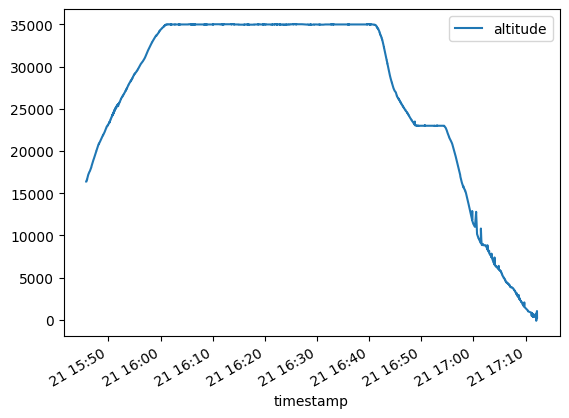

In [6]:
altitude = asset[flight_id][["timestamp", "altitude"]]
altitude.set_index("timestamp").plot()

In [7]:
from prc_challenge.utils.eda import print_dataframe_memory_footprint

print_dataframe_memory_footprint(asset)

AttributeError: 'Flight' object has no attribute 'memory_usage'